In [2]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential



In [3]:
#cargando datafrem
categorias_tr = tf.keras.utils.image_dataset_from_directory(
    './train/',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300, 300))
    
    
    
            


Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [5]:
class_names= categorias_tr.class_names

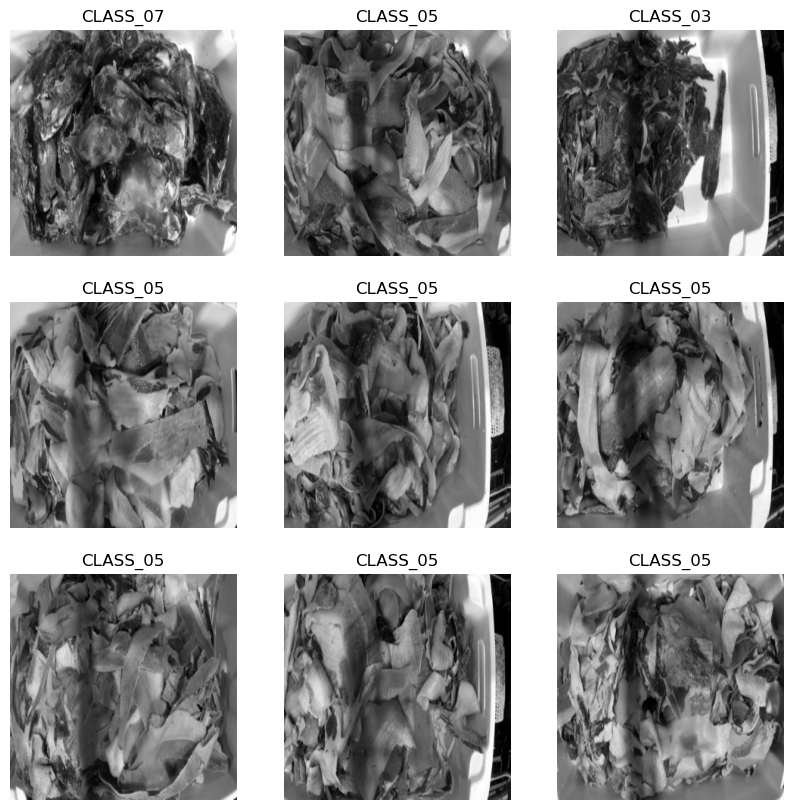

In [50]:
import cv2
plt.figure(figsize=(10, 10))
for images, labels in categorias_tr.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        # Convertir la imagen a formato BGR (si está en formato RGB)
        img_bgr = cv2.cvtColor(images[i].numpy().astype("uint8"), cv2.COLOR_RGB2BGR)
        # Aplicar el cambio de color a la imagen (por ejemplo, convertir a escala de grises)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        # Mostrar la imagen modificada
        plt.imshow(img_gray, cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")     
plt.show()

        

In [39]:
!pip install  opencv-python








     -------------------------------------- 38.1/38.1 MB 720.3 kB/s eta 0:00:00


In [7]:
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


In [9]:
#define un modelo de red neuronal convolucional (CNN) 

num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
    ])

In [10]:
#utilizando el optimizador Adam
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])        
             

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [14]:
#Realiza el entrenamiento del modelo utilizando el conjunto de datos  con el fin de aprender 
epochs=20
history = model.fit(
    categorias_tr ,
    epochs=epochs
) 



Epoch 1/20
41/41 [==============================] - 51s 1s/step - loss: 1.6377e-04 - accuracy: 1.0000
Epoch 2/20
41/41 [==============================] - 53s 1s/step - loss: 1.8996e-04 - accuracy: 1.0000
Epoch 3/20
41/41 [==============================] - 53s 1s/step - loss: 1.3997e-04 - accuracy: 1.0000
Epoch 4/20
41/41 [==============================] - 52s 1s/step - loss: 1.3001e-04 - accuracy: 1.0000
Epoch 5/20
41/41 [==============================] - 52s 1s/step - loss: 1.0594e-04 - accuracy: 1.0000
Epoch 6/20
41/41 [==============================] - 51s 1s/step - loss: 1.0790e-04 - accuracy: 1.0000
Epoch 7/20
41/41 [==============================] - 50s 1s/step - loss: 1.0152e-04 - accuracy: 1.0000
Epoch 8/20
41/41 [==============================] - 50s 1s/step - loss: 9.8751e-05 - accuracy: 1.0000
Epoch 9/20
41/41 [==============================] - 51s 1s/step - loss: 7.9631e-05 - accuracy: 1.0000
Epoch 10/20
41/41 [==============================] - 53s 1s/step - loss: 7.2673e-0

In [16]:
#evaluar el modelo del conjunto train
model.evaluate(categorias_tr, return_dict=True)

41/41 [==============================] - 16s 279ms/step - loss: 2.6137e-05 - accuracy: 1.0000


{'loss': 2.6136676751775667e-05, 'accuracy': 1.0}

# Evaluacion de conjunto de pruebas

In [18]:
categoria_test = tf.keras.utils.image_dataset_from_directory(
          './test/',
           seed = 123,
           image_size = (300 , 300))


Found 810 files belonging to 8 classes.


In [19]:
#evaluado la categoria
model.evaluate(categoria_test, return_dict=True)


26/26 [==============================] - 14s 328ms/step - loss: 0.8863 - accuracy: 0.8741


{'loss': 0.886257529258728, 'accuracy': 0.8740741014480591}

In [20]:
#evaluacion de una imagen  Test 
image_path = './test/imagentest2.png'
image = tf.keras.preprocessing.image.load_img(image_path).resize((300, 300))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)


1/1 [==============================] - 4s 4s/step


In [21]:
score = tf.nn.softmax(predictions[0])
print(
    "esta imagen pertenece a la {} con un {: .2f}  % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
     


esta imagen pertenece a la CLASS_02 con un  51.39  % de exactitud.


In [27]:
model.save('mimodelo')

INFO:tensorflow:Assets written to: mimodelo\assets


INFO:tensorflow:Assets written to: mimodelo\assets


Found 810 images belonging to 8 classes.


C:\Users\HP\AppData\Local\Temp\ipykernel_15496\2404241862.py:28: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: Undefine

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.9286    0.2708    0.4194        48
           2     0.7000    0.7216    0.7107        97
           3     0.5316    0.9333    0.6774        45
           4     0.9554    0.9325    0.9438       459
           5     1.0000    0.7895    0.8824        19
           6     0.7164    0.8421    0.7742       114
           7     0.7500    0.5556    0.6383        27

    accuracy                         0.8383       810
   macro avg     0.6977    0.6307    0.6308       810
weighted avg     0.8590    0.8383    0.8333       810



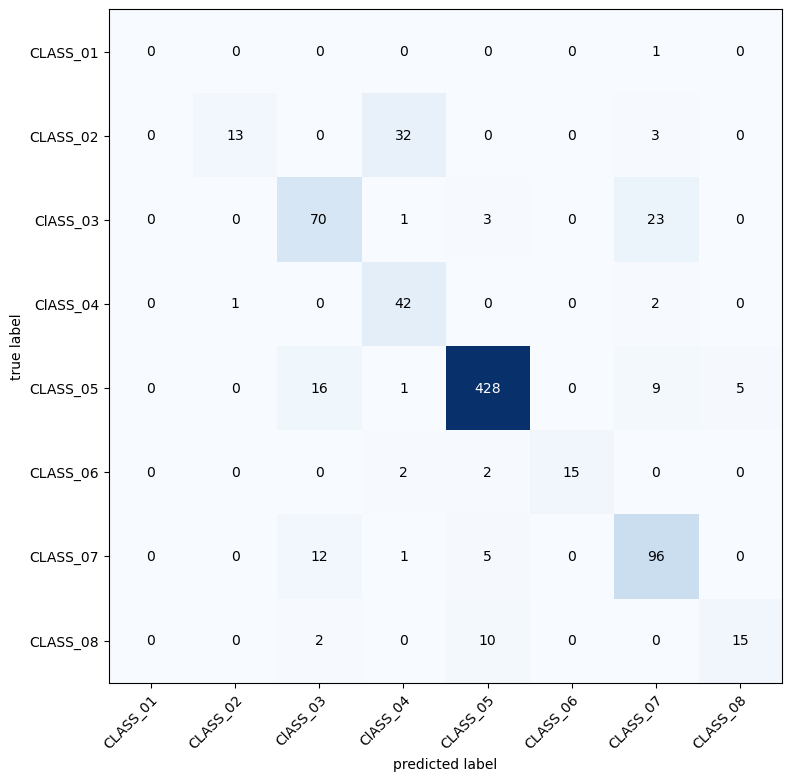

In [29]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score,roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

width_shape = 300
height_shape = 300

names = ['CLASS_01', 'CLASS_02', 'ClASS_03','ClASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

test_data_dir = './test/'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (width_shape, height_shape),
    class_mode='categorical',
    shuffle = False)

##para la grafica he usado el modelo que ya fue guardado y entrenado con imagenes train vs el dataset de test
custom_Model = load_model("modelo")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc = confusion_matrix(y_real, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()
print(metrics.classification_report(y_real, y_pred, digits = 4))



